In [1]:
import pandas as pd

enhanced_df = pd.read_csv('engineered_features.csv')
enhanced_df.head()

,Unnamed: 0,language,language_code,sentence_id,n,vertex,degree_cent,closeness_cent,betweenness_cent,pagerank_cent,...,katz_z,closeness_pagerank_z_sum,eigen_betweenness_z_product,min_rank,max_rank,rank_range,avg_rank,clustering_coef,eccentricity,num_leaf_neighbors
0,0,Spanish,17,2,17,3,0.1875,6.634524,0.341667,0.090343,...,1.144355,1.165922,0.500387,2.0,7.0,5.0,5.000000,0.333333,5.0,0
1,1,Spanish,17,2,17,14,0.1875,7.159524,0.566667,0.086008,...,1.194692,1.276864,2.127327,2.0,4.0,2.0,3.000000,1.000000,5.0,0
2,2,Spanish,17,2,17,13,0.1250,5.717857,0.125000,0.063707,...,0.643204,-0.098295,-0.019680,5.0,10.0,5.0,8.000000,0.333333,5.0,0
3,3,Spanish,17,2,17,10,0.0625,4.348016,0.000000,0.035899,...,0.141570,-1.612079,0.539086,11.0,15.0,4.0,13.333333,1.000000,5.0,0
4,4,Spanish,17,2,17,6,0.1250,6.700000,0.525000,0.057677,...,0.740305,0.174344,1.636744,3.0,10.0,7.0,5.333333,0.333333,5.0,0


In [2]:
from sklearn.model_selection import GroupKFold, GroupShuffleSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np


feature_cols = ['degree_cent', 'closeness_cent', 'betweenness_cent', 'pagerank_cent',
       'eigenvector_cent', 'katz_cent', 'degree_rank',
       'closeness_rank', 'betweenness_rank', 'pagerank_rank',
       'eigenvector_rank', 'katz_rank', 'closeness_pagerank_ratio',
       'eigen_betweenness_product', 'degree_closeness_ratio',
       'pagerank_katz_ratio', 'log_betweenness', 'log_pagerank',
       'high_closeness', 'high_betweenness', 'high_eigenvector', 'closeness_z',
       'pagerank_z', 'betweenness_z', 'eigenvector_z', 'degree_z', 'katz_z',
       'closeness_pagerank_z_sum', 'eigen_betweenness_z_product',
       'avg_rank', 'clustering_coef', 'eccentricity',
       'num_leaf_neighbors']

X = enhanced_df[feature_cols]
y = enhanced_df['is_root']

# Split data into training and testing sets
groups = enhanced_df['sentence_id']


# Split data into training and testing sets
gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Print class distribution before resampling
print("Class distribution before resampling:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after resampling
print("\nClass distribution after SMOTE resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


Class distribution before resampling:
0    8564
1     425
Name: is_root, dtype: int64

Class distribution after SMOTE resampling:
0    8564
1    8564
Name: is_root, dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
cols_to_scale = [
    'degree_cent', 'closeness_cent', 'betweenness_cent', 'pagerank_cent',
    'eigenvector_cent', 'katz_cent', 'closeness_pagerank_ratio',
    'eigen_betweenness_product', 'degree_closeness_ratio',
    'pagerank_katz_ratio', 'clustering_coef', 'eccentricity',
    'num_leaf_neighbors'
]

# Create the scaler
scaler = StandardScaler()

# Apply scaling to the selected columns
enhanced_df[cols_to_scale] = scaler.fit_transform(enhanced_df[cols_to_scale])

In [4]:

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1533
           1       0.23      0.20      0.21        75

    accuracy                           0.93      1608
   macro avg       0.60      0.58      0.59      1608
weighted avg       0.93      0.93      0.93      1608



In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Create a list of models with their names
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('LightGBM', LGBMClassifier(class_weight='balanced')),
    ('SVM', SVC(kernel='rbf', class_weight='balanced', probability=True)),
    ('Balanced Bagging', BalancedBaggingClassifier(
        estimator=DecisionTreeClassifier(),
        sampling_strategy='auto',
        replacement=False,
        random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=1)),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression(class_weight='balanced', solver='liblinear')),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)),
    ('Bagging Classifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42)),
    ('LDA', LinearDiscriminantAnalysis())
]

In [6]:
# Create a function to evaluate a single model with post-processing
def evaluate_model(name, model, X_train, y_train, X_test, y_test, test_idx, enhanced_df):
    """
    Train and evaluate a model with post-processing to ensure one root per sentence
    """
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print(f"{'='*50}")

    # Train the model
    model.fit(X_train, y_train)

    # Make raw predictions
    y_pred_raw = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being a root

    # Evaluate raw model performance
    print("\nRaw Classification Report (before ensuring one root per sentence):")
    print(classification_report(y_test, y_pred_raw))

    # Post-processing to ensure only one root per sentence
    # Create a DataFrame with test indices, sentence_ids, and prediction probabilities
    test_data = pd.DataFrame({
        'idx': test_idx,
        'sentence_id': enhanced_df.iloc[test_idx]['sentence_id'].values,
        'vertex': enhanced_df.iloc[test_idx]['vertex'].values,
        'true_label': y_test,
        'pred_proba': y_pred_proba
    })

    # For each sentence, select only the vertex with highest probability as root
    final_predictions = []
    root_indices = []  # to keep track of which indices are predicted as roots

    # Process each sentence group
    for sentence_id in test_data['sentence_id'].unique():
        # Get data for this sentence
        sentence_data = test_data[test_data['sentence_id'] == sentence_id]

        # Find the index with maximum probability
        max_prob_idx = sentence_data['pred_proba'].idxmax()

        # For evaluation, mark this vertex as root (1) and others as non-root (0)
        for idx in sentence_data.index:
            if idx == max_prob_idx:
                final_predictions.append(1)
                root_indices.append(idx)
            else:
                final_predictions.append(0)

    # Convert to numpy array for evaluation
    final_predictions = np.array(final_predictions)

    # Evaluate post-processed model performance
    print("\nPost-processed Classification Report (one root per sentence):")
    print(classification_report(y_test, final_predictions))

    # Return metrics for comparison
    raw_report = classification_report(y_test, y_pred_raw, output_dict=True)
    post_report = classification_report(y_test, final_predictions, output_dict=True)

    return {
        'name': name,
        'raw_f1': raw_report['1']['f1-score'],
        'post_f1': post_report['1']['f1-score'],
        'raw_precision': raw_report['1']['precision'],
        'post_precision': post_report['1']['precision'],
        'raw_recall': raw_report['1']['recall'],
        'post_recall': post_report['1']['recall']
    }



In [7]:
# Main script to evaluate all models
def evaluate_all_models(X_train_resampled, y_train_resampled, X_test_scaled, y_test, test_idx, enhanced_df):
    results = []

    # Evaluate all models
    for name, model in models:
        result = evaluate_model(name, model, X_train_resampled, y_train_resampled,
                              X_test_scaled, y_test, test_idx, enhanced_df)
        results.append(result)

    # Create a summary DataFrame
    results_df = pd.DataFrame(results)

    # Sort by post-processed F1 score
    results_df = results_df.sort_values(by='post_f1', ascending=False)

    print("\n\nSummary of Model Performance (sorted by post-processed F1 score):")
    print(results_df)

    # Visualize results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))

    # Plot F1 scores
    plt.subplot(1, 3, 1)
    plt.barh(results_df['name'], results_df['post_f1'], color='blue', alpha=0.7, label='Post-processed')
    plt.barh(results_df['name'], results_df['raw_f1'], color='lightblue', alpha=0.7, label='Raw')
    plt.xlabel('F1 Score')
    plt.title('F1 Score by Model')
    plt.legend()

    # Plot Precision
    plt.subplot(1, 3, 2)
    plt.barh(results_df['name'], results_df['post_precision'], color='green', alpha=0.7, label='Post-processed')
    plt.barh(results_df['name'], results_df['raw_precision'], color='lightgreen', alpha=0.7, label='Raw')
    plt.xlabel('Precision')
    plt.title('Precision by Model')
    plt.legend()

    # Plot Recall
    plt.subplot(1, 3, 3)
    plt.barh(results_df['name'], results_df['post_recall'], color='red', alpha=0.7, label='Post-processed')
    plt.barh(results_df['name'], results_df['raw_recall'], color='lightcoral', alpha=0.7, label='Raw')
    plt.xlabel('Recall')
    plt.title('Recall by Model')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return results_df


Evaluating Random Forest

Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1533
           1       0.23      0.20      0.21        75

    accuracy                           0.93      1608
   macro avg       0.60      0.58      0.59      1608
weighted avg       0.93      0.93      0.93      1608


Post-processed Classification Report (one root per sentence):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1533
           1       0.25      0.25      0.25        75

    accuracy                           0.93      1608
   macro avg       0.61      0.61      0.61      1608
weighted avg       0.93      0.93      0.93      1608


Evaluating LightGBM
[LightGBM] [Info] Number of positive: 8564, number of negative: 8564
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003236 seco

/home/sakana/anaconda3/envs/ML/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1533
           1       0.30      0.16      0.21        75

    accuracy                           0.94      1608
   macro avg       0.63      0.57      0.59      1608
weighted avg       0.93      0.94      0.94      1608


Post-processed Classification Report (one root per sentence):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1533
           1       0.29      0.29      0.29        75

    accuracy                           0.93      1608
   macro avg       0.63      0.63      0.63      1608
weighted avg       0.93      0.93      0.93      1608


Evaluating Decision Tree

Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1533
           1

/home/sakana/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Evaluating Logistic Regression

Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1533
           1       0.15      0.79      0.25        75

    accuracy                           0.78      1608
   macro avg       0.57      0.78      0.56      1608
weighted avg       0.95      0.78      0.84      1608


Post-processed Classification Report (one root per sentence):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1533
           1       0.31      0.31      0.31        75

    accuracy                           0.94      1608
   macro avg       0.64      0.64      0.64      1608
weighted avg       0.94      0.94      0.94      1608


Evaluating KNN

Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91 

/home/sakana/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1533
           1       0.17      0.63      0.27        75

    accuracy                           0.84      1608
   macro avg       0.57      0.74      0.59      1608
weighted avg       0.94      0.84      0.88      1608


Post-processed Classification Report (one root per sentence):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1533
           1       0.20      0.20      0.20        75

    accuracy                           0.93      1608
   macro avg       0.58      0.58      0.58      1608
weighted avg       0.93      0.93      0.93      1608


Evaluating Bagging Classifier

Raw Classification Report (before ensuring one root per sentence):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1533
       

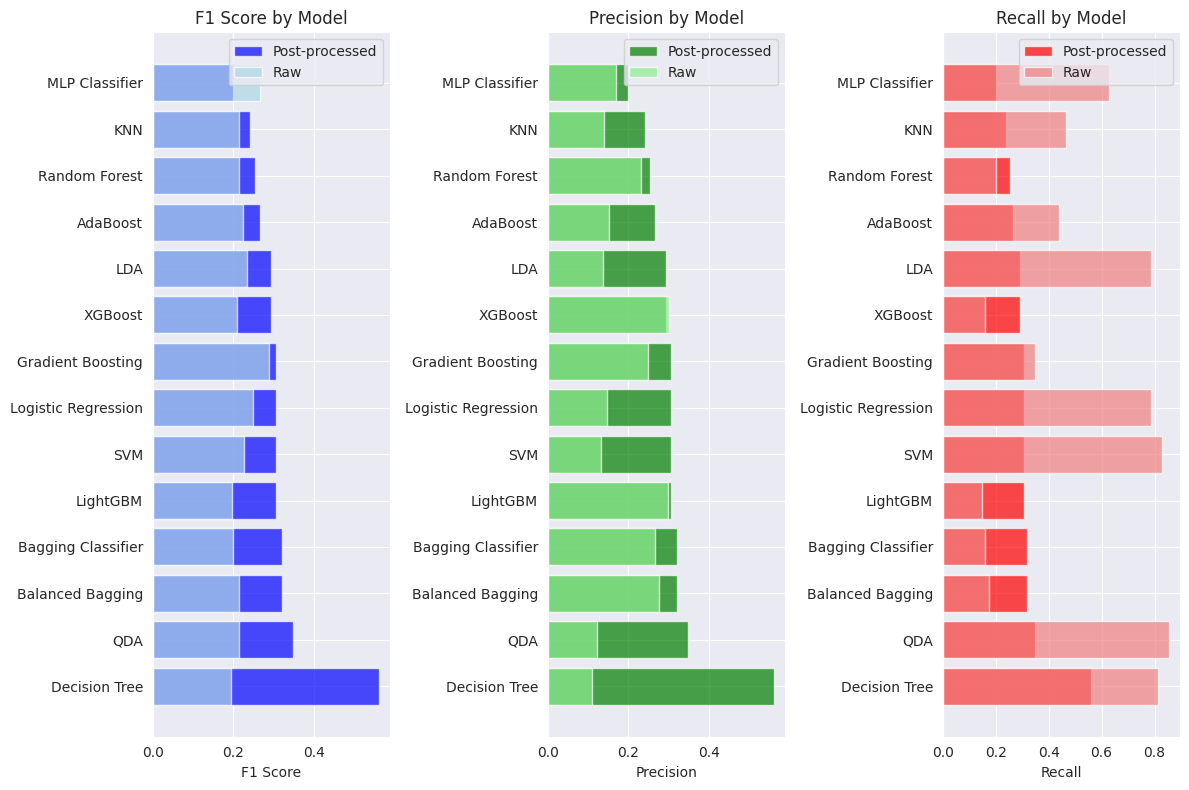

,name,raw_f1,post_f1,raw_precision,post_precision,raw_recall,post_recall
5,Decision Tree,0.194888,0.560000,0.110708,0.560000,0.813333,0.560000
6,QDA,0.214765,0.346667,0.122841,0.346667,0.853333,0.346667
3,Balanced Bagging,0.213115,0.320000,0.276596,0.320000,0.173333,0.320000
12,Bagging Classifier,0.200000,0.320000,0.266667,0.320000,0.160000,0.320000
1,LightGBM,0.196429,0.306667,0.297297,0.306667,0.146667,0.306667
2,SVM,0.226691,0.306667,0.131356,0.306667,0.826667,0.306667
7,Logistic Regression,0.248945,0.306667,0.147870,0.306667,0.786667,0.306667
10,Gradient Boosting,0.288889,0.306667,0.247619,0.306667,0.346667,0.306667
4,XGBoost,0.208696,0.293333,0.300000,0.293333,0.160000,0.293333
13,LDA,0.233663,0.293333,0.137209,0.293333,0.786667,0.293333


In [8]:
evaluate_all_models(X_train_resampled, y_train_resampled, X_test, y_test, test_idx, enhanced_df)